In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [10]:
def generate_data(n):
    """
    Generates data for a logistic regression problem

    Parameters:
    n: number of data

    Returns:
    X (numpy array): input features
    y (numpy array): target values
    """

    np.random.seed(0) # set the seed for reproducibility
    X = np.random.randn(n, 2) # generate random values with normal distribution with mean 0 and standard deviation 1
    y = np.zeros((n, 1)) # initialize y with all zeros
    y[X[:, 1] > X[:, 0]] = 1 # assign 1 to the elements in y where the second column of X is greater than the first column
    X = X + np.random.normal(0, 0.1, X.shape) # add random noise with normal distribution with mean 0 and standard deviation 0.1
    return X, y # return the generated data

# n is set to 100
n = 100
X, y = generate_data(n) # call the function with n as the input

In [11]:
def sigmoid(z):
    """
    Calculates the sigmoid function for the given input z
    """
    return 1 / (1 + np.exp(-z))

def logistic_regression_gd(X, y, learning_rate=0.1, num_iters=1000):
    """
    Implements the logistic regression model using gradient descent

    Parameters:
    X (numpy array): input features
    y (numpy array): target values
    learning_rate (float): the learning rate for the gradient descent algorithm
    num_iters (int): number of iterations for the gradient descent algorithm

    Returns:
    numpy array: optimized weights
    """
    n = len(X)
    # Add a column of ones to X for the intercept term
    X = np.hstack((np.ones((n, 1)), X))
    # Initialize theta with zeros
    theta = np.zeros((X.shape[1], 1))
    m = X.shape[0]
    # Loop over the number of iterations
    for i in range(num_iters):
        # Calculate the dot product of X and theta
        z = X.dot(theta)
        # Calculate the true gradient (all examples)
        gradient_gd = (1/m) * X.T.dot(sigmoid(z) - y)
        # Update theta
        theta = theta - learning_rate * gradient_gd
    return theta

def plot_decision_boundary_gd(theta, X, y):
    """
    Plots the decision boundary for the logistic regression model

    Parameters:
    theta (numpy array): optimized weights
    X (numpy array): input features
    y (numpy array): target values
    """
    n = len(X)
    # Generate a grid of points for x1
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), n)
    # Generate a grid of points for x2
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), n)
    # Create a meshgrid from x1 and x2
    X1, X2 = np.meshgrid(x1, x2)
    # Stack the meshgrid into a single array
    X_test = np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1)))
    # Add a column of ones to X_test for the intercept term
    X_test = np.hstack((np.ones((n**2, 1)), X_test))
    # Calculate the dot product of X_test and theta
    y_pred = X_test.dot(theta)
    # Apply the sigmoid function to y_pred
    y_pred = np.round(1 / (1 + np.exp(-y_pred)))
    # Reshape y_pred into a grid
    y_pred = y_pred.reshape(n, n)
     # Plot the decision boundary using the contour function

    plt.contourf(X1, X2, y_pred, cmap='binary')

    # Plot the data points as scatterplots
    plt.scatter(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], c='r')
    plt.scatter(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], c='b')

    # Show the plot
    plt.show()



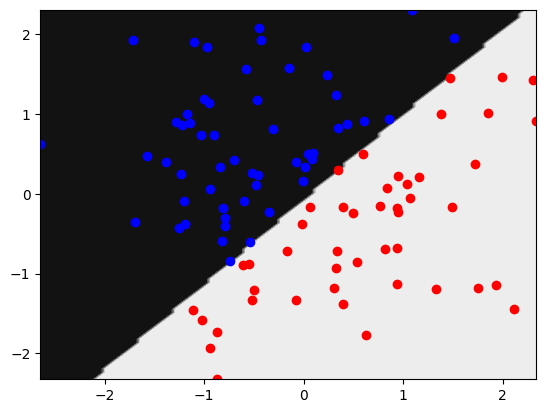

In [12]:
theta_gd = logistic_regression_gd(X, y) # Call the function with X and y as inputs
plot_decision_boundary_gd(theta_gd, X, y) # Plot the decision boundary

In [13]:
#Logistic Regression using Stochastic Gradient Descent

def logistic_regression_sgd(X, y, learning_rate=0.1, num_iters=1000):
    """
    Implements the logistic regression model using stochastic gradient descent

    Parameters:
    X (numpy array): input features
    y (numpy array): target values
    learning_rate (float): the learning rate for the stochastic gradient descent algorithm
    num_iters (int): number of iterations for the stochastic gradient descent algorithm

    Returns:
    numpy array: optimized weights
    """
    n = len(X)
    # Add a column of ones to X for the intercept term
    X = np.hstack((np.ones((n, 1)), X))
    # Initialize theta with zeros
    theta = np.zeros((X.shape[1], 1))
    m = X.shape[0]
    # Loop over the number of iterations
    for i in range(num_iters):
        # Select a random sample
        index = np.random.randint(0, m)
        x = X[index, :].reshape(1, X.shape[1])
        y_ = y[index, :].reshape(1, 1)
        # Calculate the dot product of x and theta
        z = x.dot(theta)
        # Calculate the stochastic gradient
        gradient_sgd = x.T.dot(sigmoid(z) - y_)
        # Update theta
        theta = theta - learning_rate * gradient_sgd
    return theta


def plot_decision_boundary_sgd(theta, X, y):
    """
    Plots the decision boundary for the logistic regression model for stochastic gradient descent

    Parameters:
    theta (numpy array): optimized weights
    X (numpy array): input features
    y (numpy array): target values
    """
    n = len(X)
    # Generate a grid of points for x1
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), n)
    # Generate a grid of points for x2
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), n)
    # Create a meshgrid from x1 and x2
    X1, X2 = np.meshgrid(x1, x2)
    # Stack the meshgrid into a single array
    X_test = np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1)))
    # Add a column of ones to X_test for the intercept term
    X_test = np.hstack((np.ones((n**2, 1)), X_test))
    # Calculate the dot product of X_test and theta
    y_pred = X_test.dot(theta)
    # Apply the sigmoid function to y_pred
    y_pred = np.round(1 / (1 + np.exp(-y_pred)))
    # Reshape y_pred into a grid
    y_pred = y_pred.reshape(n, n)
     # Plot the decision boundary using the contour function

    plt.contourf(X1, X2, y_pred, cmap='binary')

    # Plot the data points as scatterplots
    plt.scatter(X[y[:, 0] == 0, 0], X[y[:, 0] == 0, 1], c='r')
    plt.scatter(X[y[:, 0] == 1, 0], X[y[:, 0] == 1, 1], c='b')

    # Show the plot
    plt.show()



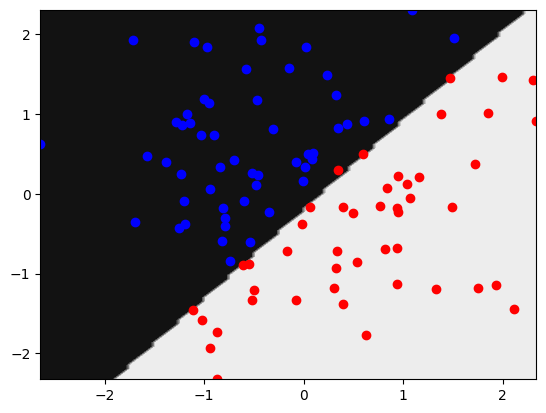

In [14]:
theta_sgd = logistic_regression_sgd(X, y) # Call the function with X and y as inputs
plot_decision_boundary_gd(theta_sgd, X, y) # Plot the decision boundary

In [15]:
def calculate_error(theta, X, y):
    """
    Calculates the logistic regression error between the predicted and actual target values

    Parameters:
    theta (numpy array): optimized weights
    X (numpy array): input features
    y (numpy array): target values

    Returns:
    float: error value
    """
    # Number of examples
    n = len(X)
    # Add a column of ones to X for the intercept term
    X = np.hstack((np.ones((n, 1)), X))
    # Calculate the dot product of X and theta
    z = np.dot(X, theta)
    # Calculate the predicted target values
    h = sigmoid(z)
    # Calculate the logistic regression error between h and y
    error = -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))
    return error


In [16]:
# Compare the time and accuracy of each implementation of logistic regression

start_time = time.time()
theta_gd = logistic_regression_gd(X, y)
print("Time taken by Gradient Descent:", time.time() - start_time, "Error of Gradient Descent:", calculate_error(theta_gd, X, y))

start_time = time.time()
theta_sgd = logistic_regression_sgd(X, y)
print("Time taken by Stochastic Gradient Descent:", time.time() - start_time, "Error of Stochastic Gradient Descent:", calculate_error(theta_sgd, X, y))

Time taken by Gradient Descent: 0.04369020462036133 Error of Gradient Descent: 0.10617005547062269
Time taken by Stochastic Gradient Descent: 0.050195932388305664 Error of Stochastic Gradient Descent: 0.10596920859157949
